# Data Exploration

In [1]:
%cd ..

C:\Users\ganiy\OneDrive\Documents\IMDB-TV


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme(style = "dark")
%matplotlib inline
import matplotlib.pyplot as plt

### Loading data sets

In [3]:
# Loading IMDb dataset
imdb_data = pd.read_csv("cumulative-data/tv_dataset.csv")
# Loading top 1000 episodes on IMDb
top_episodes = pd.read_csv("cumulative-data/top1000_episodes_imdb.csv")
# Loading top 250 TV shows on IMDb data set
top_250 = pd.read_csv("cumulative-data/IMDb_top_250.csv")

In [4]:
imdb_data.head()

,tv,season,episode_number,title,airdate,rating,total_votes,desc,encoded_title
0,Luther,1,0,Inside Look,"May 4, 2010",8.0,781,"Series creator and writer Neil Cross, and Luth...",tt1474684
1,Luther,1,1,Episode #1.1,"Oct 17, 2010",8.2,3323,Luther returns to work after a traumatic arres...,tt1474684
2,Luther,1,2,Episode #1.2,"Oct 24, 2010",8.2,2879,A gunman is murdering uniformed police officer...,tt1474684
3,Luther,1,3,Episode #1.3,"Oct 31, 2010",8.0,2676,John Luther is on the trail of a satanic occul...,tt1474684
4,Luther,1,4,Episode #1.4,"Nov 7, 2010",8.5,2759,"When a serial killer goes on the rampage, Luth...",tt1474684


In [5]:
len(imdb_data)

15541

In [6]:
imdb_data = imdb_data[imdb_data["rating"] > 0]

In [7]:
len(imdb_data)

15376

In [8]:
top_episodes.head()

,tv_show,episode,rating,year,total_votes,desc,genre,encoded_title,genre1,genre2,genre3
0,Attack on Titan,Hero,9.9,2019,83546,As Erwin's heroic charge buys Levi time to con...,"Animation, Action, Adventure",tt2560140,Animation,Action,Adventure
1,Attack on Titan,Perfect Game,9.9,2019,44994,"While one front is rained on by flames, the ot...","Animation, Action, Adventure",tt2560140,Animation,Action,Adventure
2,Mr. Robot,407 Proxy Authentication Required,9.9,2019,26074,Vera holds Krista hostage as he tries to force...,"Crime, Drama, Thriller",tt4158110,Crime,Drama,Thriller
3,Attack on Titan,Senshi,9.9,2017,27872,"Following the battle, the Scouts regroup atop ...","Animation, Action, Adventure",tt2560140,Animation,Action,Adventure
4,Game of Thrones,The Winds of Winter,9.9,2016,142118,Cersei and Loras Tyrell stand trial by the god...,"Action, Adventure, Drama",tt0944947,Action,Adventure,Drama


In [9]:
top_250.head()

,title,rating,total_votes,description,year,link,encoded_title
0,Planet Earth II,9.5,110000,David Attenborough returns with a new wildlife...,2016,https://www.imdb.com/title/tt5491994,tt5491994
1,Planet Earth,9.4,178000,"Emmy Award-winning, 11 episodes, five years in...",2006,https://www.imdb.com/title/tt0795176,tt0795176
2,Breaking Bad,9.4,1700000,A high school chemistry teacher diagnosed with...,2008,https://www.imdb.com/title/tt0903747,tt0903747
3,Band of Brothers,9.4,414000,The story of Easy Company of the U.S. Army 101...,2001,https://www.imdb.com/title/tt0185906,tt0185906
4,Chernobyl,9.3,650000,"In April 1986, an explosion at the Chernobyl n...",2019,https://www.imdb.com/title/tt7366338,tt7366338


### Top 10 shows by ratings and votes

In [10]:
top_10_ratings = top_250.loc[:9, ["title", "rating"]]

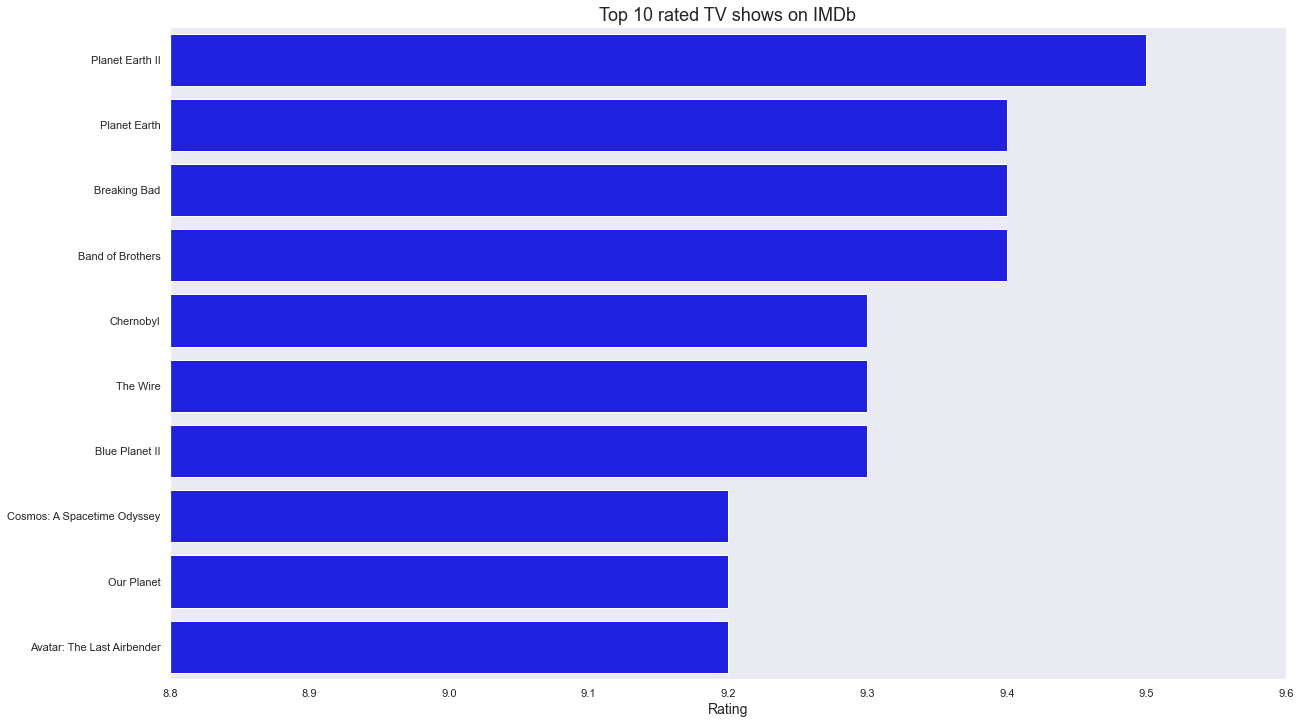

In [11]:
plt.figure(figsize = (20,12))
sns.barplot(y = "title", x = "rating", data = top_10_ratings, color = "blue")
plt.title("Top 10 rated TV shows on IMDb", fontsize = 18)
plt.ylabel("", fontsize = 14)
plt.xlabel("Rating", fontsize = 14)
plt.xlim(8.8,9.6)
plt.show();

In [12]:
top_votes = top_250.sort_values("total_votes", ascending = False).reset_index(drop=True)
top_10_votes = top_votes.loc[:9, ["title", "total_votes"]]

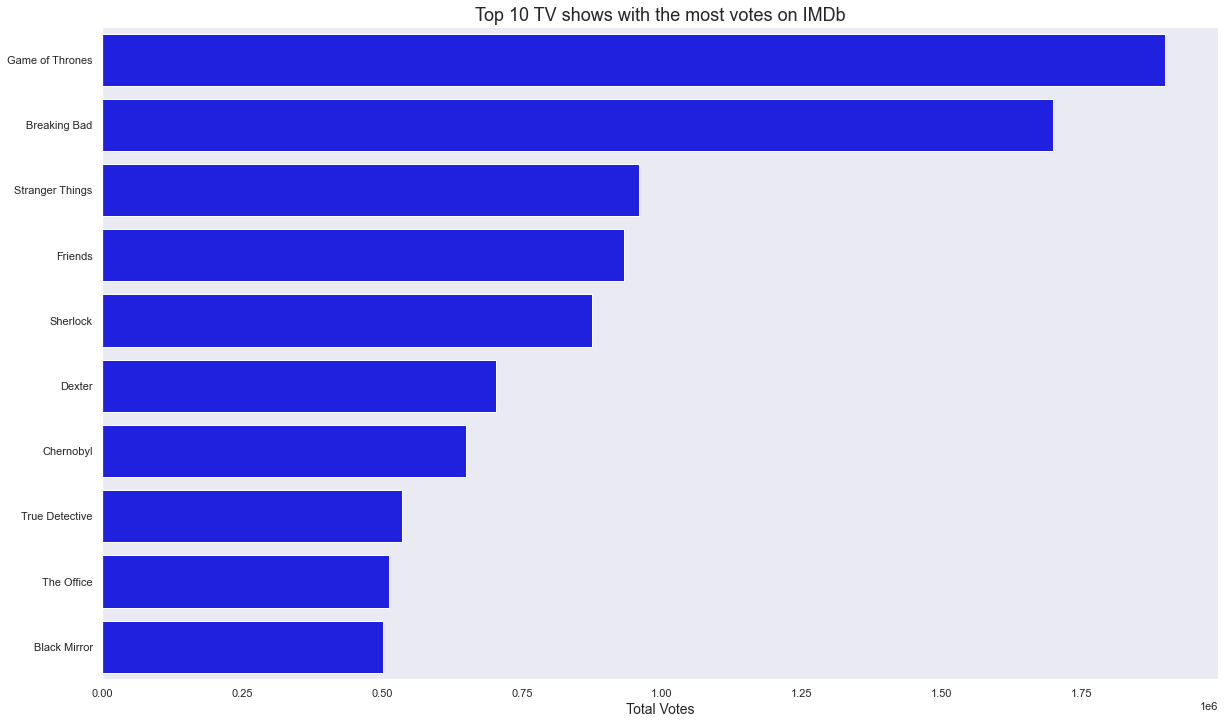

In [13]:
plt.figure(figsize = (20,12))
sns.barplot(y = "title", x = "total_votes", data = top_10_votes, color = "blue")
plt.title("Top 10 TV shows with the most votes on IMDb", fontsize = 18)
plt.ylabel("", fontsize = 14)
plt.xlabel("Total Votes", fontsize = 14)
#plt.xticks(rotation = 60)
#plt.ylim(8.8,9.6)
plt.show();

### Top 10 shows by ratings and votes - Aggregation by episode

In [14]:
mean_ratings = imdb_data.groupby(["tv", "encoded_title"], as_index = False)["rating"].mean()

In [15]:
mean_ratings_sorted = mean_ratings.sort_values("rating", ascending = False).reset_index(drop =True)

In [16]:
top10_mean_ratings = mean_ratings_sorted.loc[:9, ["tv", "rating"]]

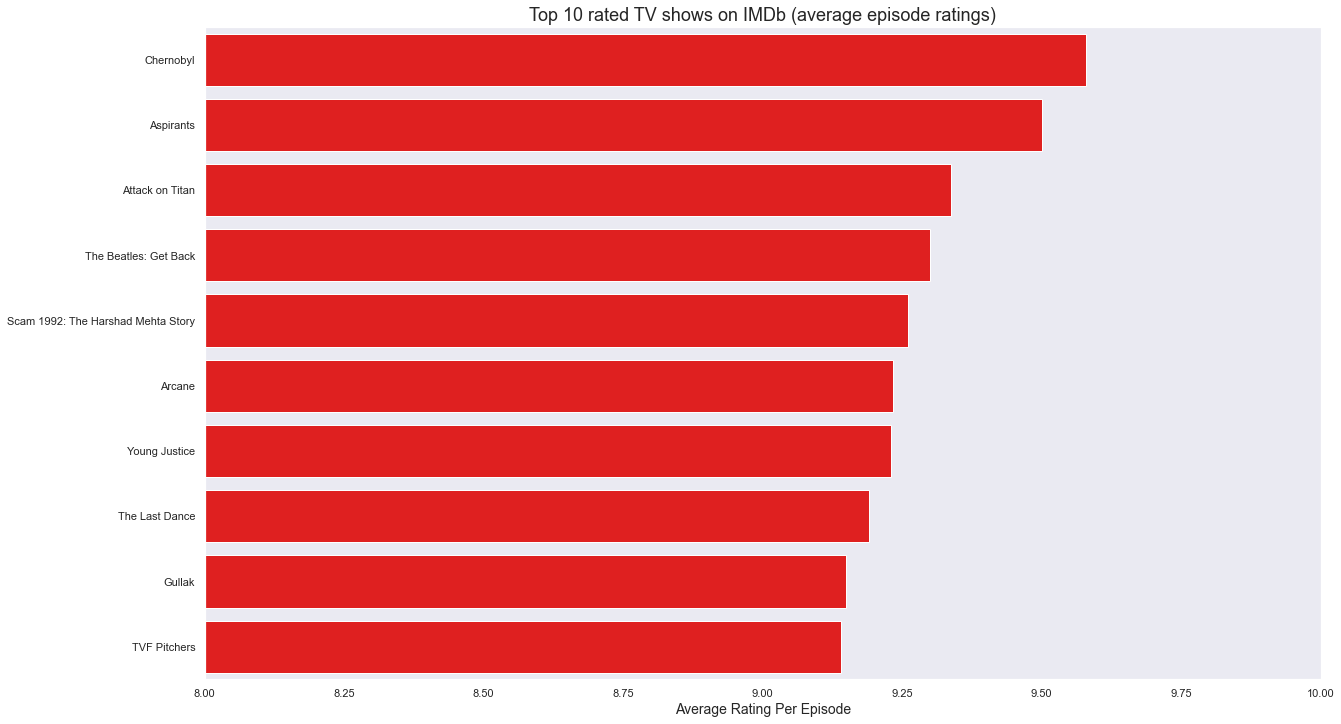

In [17]:
plt.figure(figsize = (20,12))
sns.barplot(y = "tv", x = "rating", data = top10_mean_ratings, color = "red")
plt.title("Top 10 rated TV shows on IMDb (average episode ratings)", fontsize = 18)
plt.ylabel("", fontsize = 14)
plt.xlabel("Average Rating Per Episode", fontsize = 14)
#plt.xticks(rotation = 60)
plt.xlim(8,10)
plt.show();

In [18]:
mean_votes = imdb_data.groupby(["tv", "encoded_title"], as_index = False)["total_votes"].mean()
mean_votes_sorted = mean_votes.sort_values("total_votes", ascending = False).reset_index(drop = True)
top10_total_votes = mean_votes_sorted.loc[:9, ["tv", "total_votes"]]

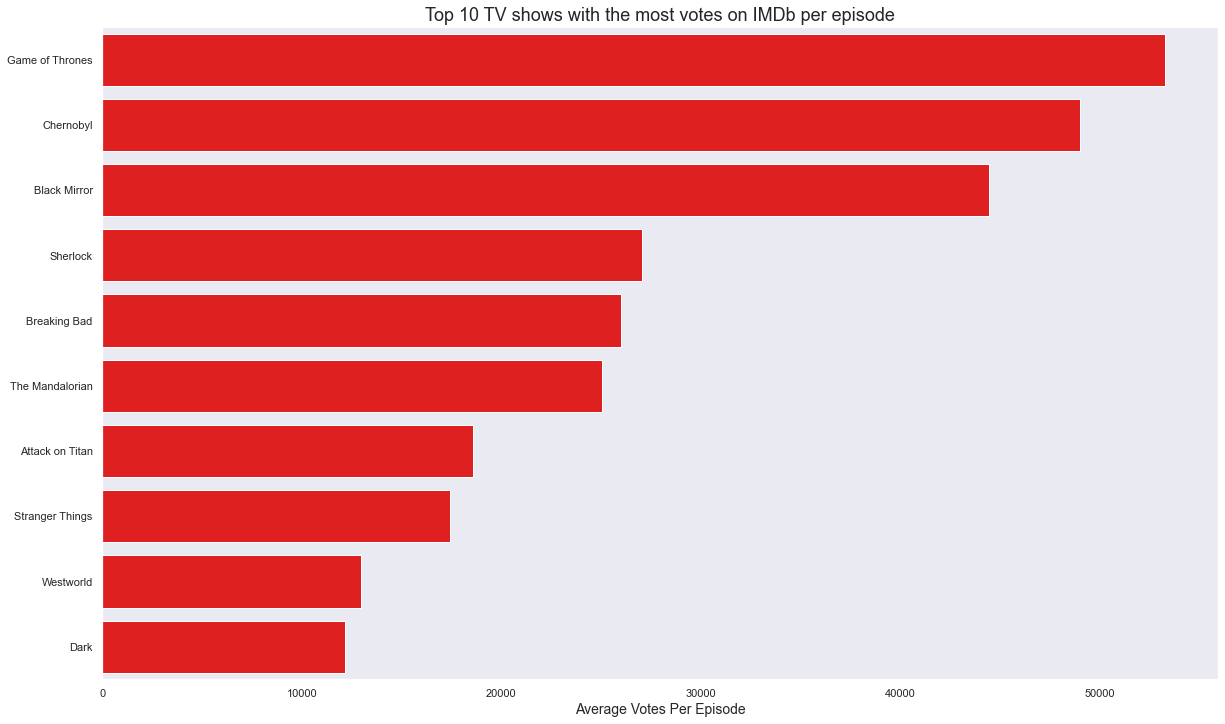

In [19]:
plt.figure(figsize = (20,12))
sns.barplot(y = "tv", x = "total_votes", data = top10_total_votes, color = "red")
plt.title("Top 10 TV shows with the most votes on IMDb per episode", fontsize = 18)
plt.ylabel("", fontsize = 14)
plt.xlabel("Average Votes Per Episode", fontsize = 14)
#plt.xticks(rotation = 60)
#plt.ylim(8.8,9.6)
plt.show();

### Top 10 seasons by ratings and votes

In [20]:
season_ratings = imdb_data.groupby(["tv", "encoded_title", "season"], as_index = False)["rating"].mean()

In [21]:
season_ratings["season"] = season_ratings["season"].astype(str)

In [22]:
season_ratings["tv_season"] = season_ratings["tv"] + " " + season_ratings["season"]

In [23]:
season_ratings = season_ratings.sort_values("rating", ascending = False).reset_index()
season_ratings_top10 = season_ratings.loc[:9, ["tv_season", "rating"]]

In [24]:
season_ratings_top10.to_csv("data-for-charts/season_ratings_top10.csv", index = False)

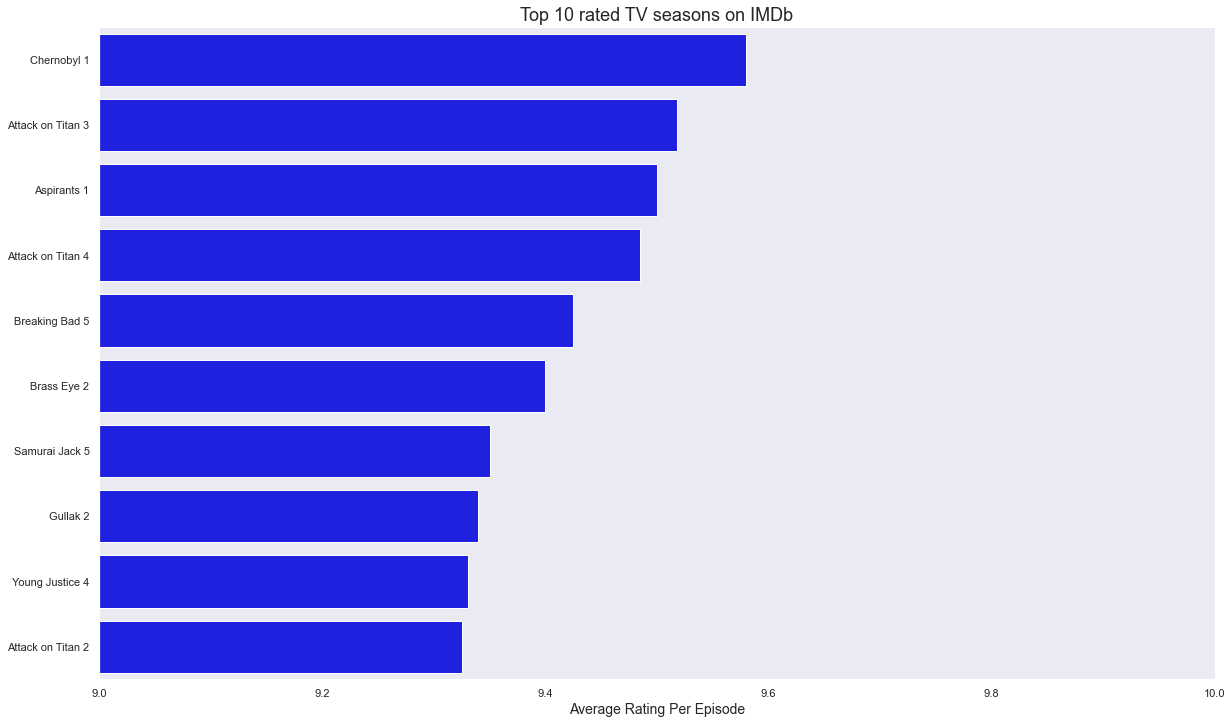

In [25]:
plt.figure(figsize = (20,12))
sns.barplot(y = "tv_season", x = "rating", data = season_ratings_top10, color = "blue")
plt.title("Top 10 rated TV seasons on IMDb", fontsize = 18)
plt.ylabel("", fontsize = 14)
plt.xlabel("Average Rating Per Episode", fontsize = 14)
#plt.xticks(rotation = 60)
plt.xlim(9,10)
plt.show();

In [26]:
season_votes = imdb_data.groupby(["tv", "encoded_title", "season"], as_index = False)["total_votes"].mean()

In [27]:
season_votes["season"] = season_votes["season"].astype(str)

In [28]:
season_votes["tv_season"] = season_votes["tv"] + "," + season_votes["season"]

In [29]:
season_votes = season_votes.sort_values("total_votes", ascending = False).reset_index()
season_votes_top10 = season_votes.loc[:9, ["tv_season", "total_votes"]]

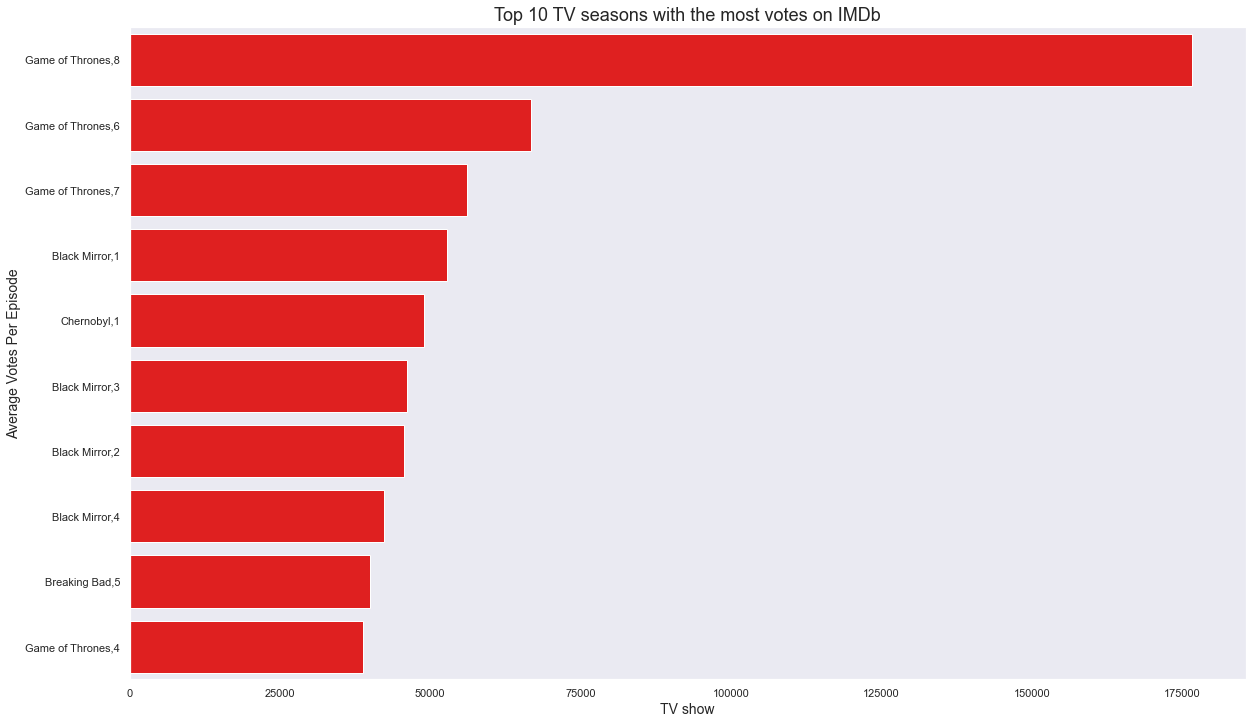

In [30]:
plt.figure(figsize = (20,12))
sns.barplot(y = "tv_season", x = "total_votes", data = season_votes_top10, color = "red")
plt.title("Top 10 TV seasons with the most votes on IMDb", fontsize = 18)
plt.xlabel("TV show", fontsize = 14)
plt.ylabel("Average Votes Per Episode", fontsize = 14)
#plt.xticks(rotation = 60)
#plt.ylim(8.8,9.6)
plt.show();

### Comparison between IMDb ratings and IMDb ratings by episode

In [31]:
top_250_new = top_250.merge(mean_ratings, on = "encoded_title")

In [32]:
top_250_new = top_250_new.drop('tv', axis = 1)

In [33]:
top_250_new = top_250_new[["title", "rating_x", "rating_y", "total_votes", "encoded_title"]]

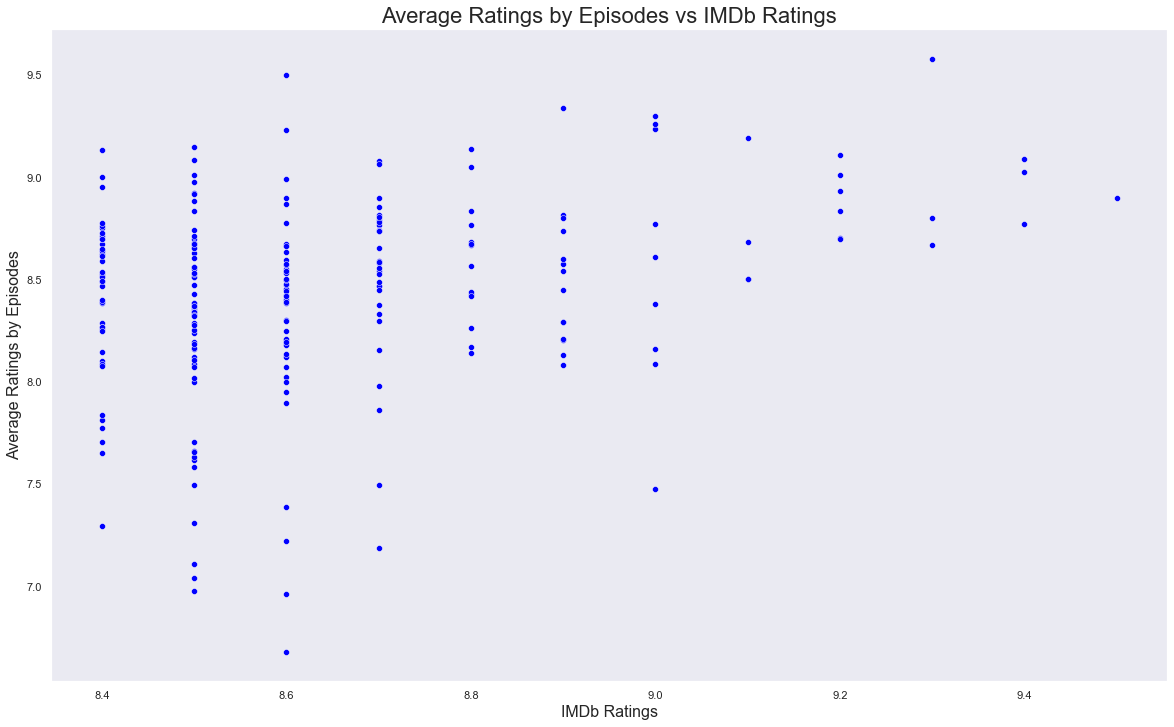

In [34]:
plt.figure(figsize = (20,12))
sns.scatterplot(x = "rating_x", y = "rating_y", data = top_250_new, color = "blue")
plt.title("Average Ratings by Episodes vs IMDb Ratings", fontsize = 22)
plt.xlabel("IMDb Ratings", fontsize = 16)
plt.ylabel("Average Ratings by Episodes", fontsize =16)
plt.show();

### Which TV show produces the best episodes?

In [35]:
best_episodes = top_episodes.groupby(["tv_show", "encoded_title"], as_index = False)["rating"].count()

In [36]:
best_episodes = best_episodes.rename(columns={"rating":"rating_count"})

In [37]:
best_episodes = best_episodes.sort_values("rating_count", ascending = False).reset_index(drop = True)
best_episodes_top10 = best_episodes.loc[:9,:]

In [38]:
best_episodes_top10.to_csv("data-for-charts/best_episodes_top10.csv", index = False)

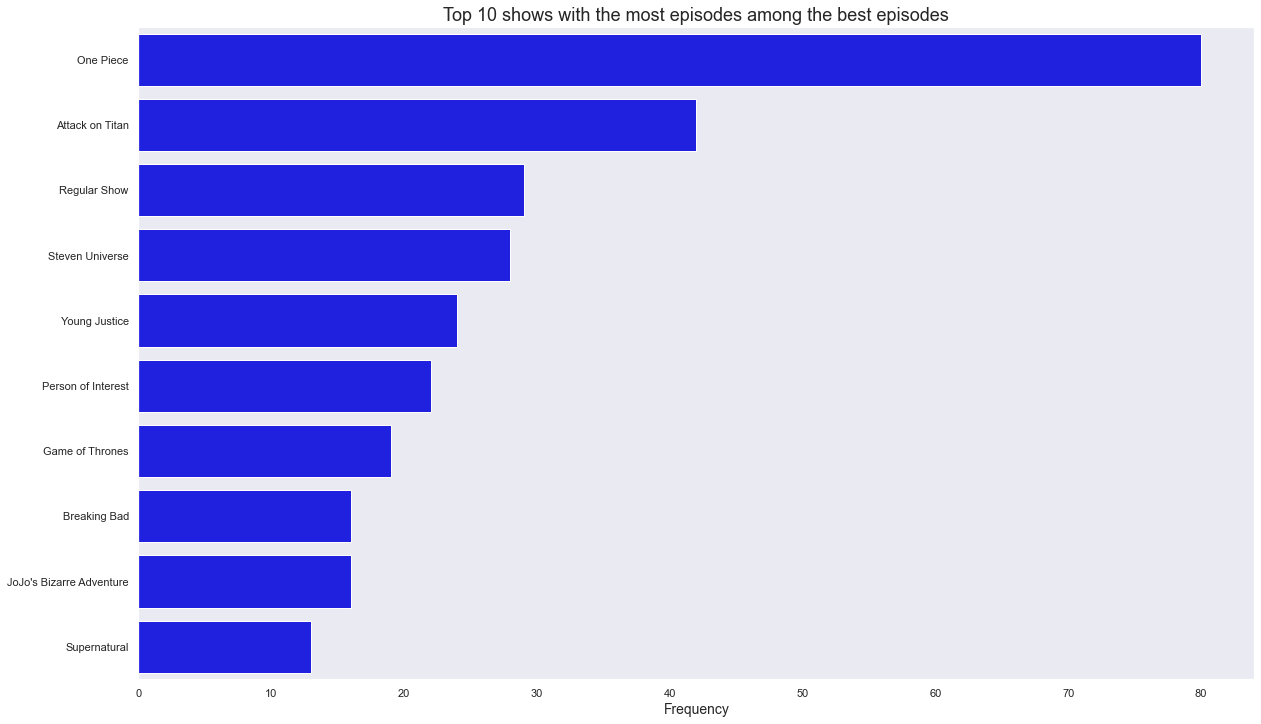

In [39]:
plt.figure(figsize = (20,12))
sns.barplot(y = "tv_show", x = "rating_count", data = best_episodes_top10, color = "blue")
plt.title("Top 10 shows with the most episodes among the best episodes", fontsize = 18)
plt.ylabel("", fontsize = 14)
plt.xlabel("Frequency", fontsize = 14)
plt.show();

In [40]:
imdb_episodes_count = imdb_data.groupby(["tv", "encoded_title"], as_index = False)["rating"].count()

In [41]:
imdb_episodes_count = imdb_episodes_count.rename(columns={"rating":"episode_count"})

In [42]:
best_episodes_prop = imdb_episodes_count.merge(best_episodes, on = "encoded_title")

In [43]:
best_episodes_prop

,tv,encoded_title,episode_count,tv_show,rating_count
0,1883,tt13991232,6,1883,1
1,Adventure Time,tt1305826,289,Adventure Time,9
2,After Life,tt8398600,18,After Life,1
3,Anne with an E,tt5421602,27,Anne with an E,2
4,Arcane,tt11126994,9,Arcane,5
...,...,...,...,...,...
111,What We Do in the Shadows,tt7908628,30,What We Do in the Shadows,1
112,When They See Us,tt7137906,4,When They See Us,1
113,Yellowstone,tt4236770,39,Yellowstone,2
114,Young Justice,tt1641384,85,Young Justice,24


In [60]:
best_episodes_prop["rating_prop"] = best_episodes_prop["rating_count"]/best_episodes_prop["episode_count"]
best_episodes_prop = best_episodes_prop.sort_values("rating_prop", ascending = False).reset_index(drop = True)
best_episodes_prop = best_episodes_prop[best_episodes_prop["episode_count"] >= 30].reset_index(drop = True)
best_episodes_prop_top10 = best_episodes_prop.loc[:9,:]

In [61]:
best_episodes_prop_top10

,tv,encoded_title,episode_count,tv_show,rating_count,rating_prop
0,Attack on Titan,tt2560140,79,Attack on Titan,42,0.531646
1,Young Justice,tt1641384,85,Young Justice,24,0.282353
2,Mr. Robot,tt4158110,45,Mr. Robot,12,0.266667
3,Game of Thrones,tt0944947,73,Game of Thrones,19,0.260274
4,Breaking Bad,tt0903747,62,Breaking Bad,16,0.258065
5,Daredevil,tt3322312,39,Daredevil,8,0.205128
6,Better Call Saul,tt3032476,50,Better Call Saul,9,0.180000
7,Avatar: The Last Airbender,tt0417299,62,Avatar: The Last Airbender,9,0.145161
8,Demon Slayer: Kimetsu no Yaiba,tt9335498,42,Demon Slayer: Kimetsu no Yaiba,6,0.142857
9,Rick and Morty,tt2861424,51,Rick and Morty,7,0.137255


In [46]:
best_episodes_prop_top10.to_csv("data-for-charts/best_episodes_prop_top10.csv", index = False)

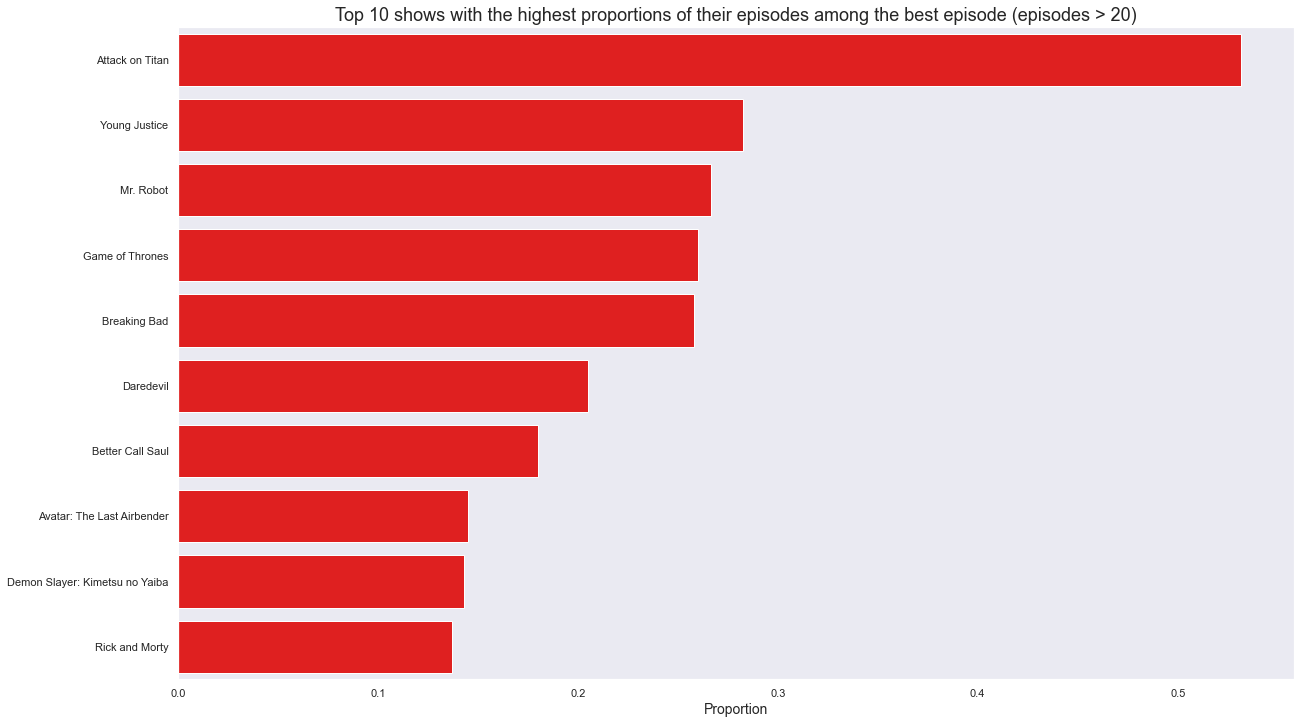

In [47]:
plt.figure(figsize = (20,12))
sns.barplot(y = "tv", x = "rating_prop", data = best_episodes_prop_top10, color = "red")
plt.title("Top 10 shows with the highest proportions of their episodes among the best episode (episodes > 20)", fontsize = 18)
plt.ylabel("", fontsize = 14)
plt.xlabel("Proportion", fontsize = 14)
plt.show();

### The Big Shows

In [48]:
imdb_data_big4 = imdb_data[imdb_data["tv"].isin(["Game of Thrones", "Breaking Bad", "The Wire", "The Sopranos"])]

In [49]:
imdb_data_big4["tv"].unique()

array(['Game of Thrones', 'The Sopranos', 'The Wire', 'Breaking Bad'],
      dtype=object)

In [50]:
imdb_data_big4

,tv,season,episode_number,title,airdate,rating,total_votes,desc,encoded_title
15125,Game of Thrones,1,1,Winter Is Coming,"Apr 17, 2011",9.1,45502,Eddard Stark is torn between his family and an...,tt0944947
15126,Game of Thrones,1,2,The Kingsroad,"Apr 24, 2011",8.8,34563,"While Bran recovers from his fall, Ned takes o...",tt0944947
15127,Game of Thrones,1,3,Lord Snow,"May 1, 2011",8.7,32727,Jon begins his training with the Night's Watch...,tt0944947
15128,Game of Thrones,1,4,"Cripples, Bastards, and Broken Things","May 8, 2011",8.8,31113,Eddard investigates Jon Arryn's murder. Jon be...,tt0944947
15129,Game of Thrones,1,5,The Wolf and the Lion,"May 15, 2011",9.1,32367,Catelyn has captured Tyrion and plans to bring...,tt0944947
...,...,...,...,...,...,...,...,...,...
15519,Breaking Bad,5,12,Rabid Dog,"Sep 1, 2013",9.2,24116,Walt discovers Jesse broke into his house and ...,tt0903747
15520,Breaking Bad,5,13,To'hajiilee,"Sep 8, 2013",9.8,40556,Jesse and Hank come up with an idea to take Wa...,tt0903747
15521,Breaking Bad,5,14,Ozymandias,"Sep 15, 2013",9.9,159741,Walt goes on the run. Jesse is taken hostage. ...,tt0903747
15522,Breaking Bad,5,15,Granite State,"Sep 22, 2013",9.7,40498,Walt struggles as he adapts to aspects of his ...,tt0903747


In [51]:
imdb_data_big4.to_csv("data-for-charts/imdb_data_big4.csv", index = False)

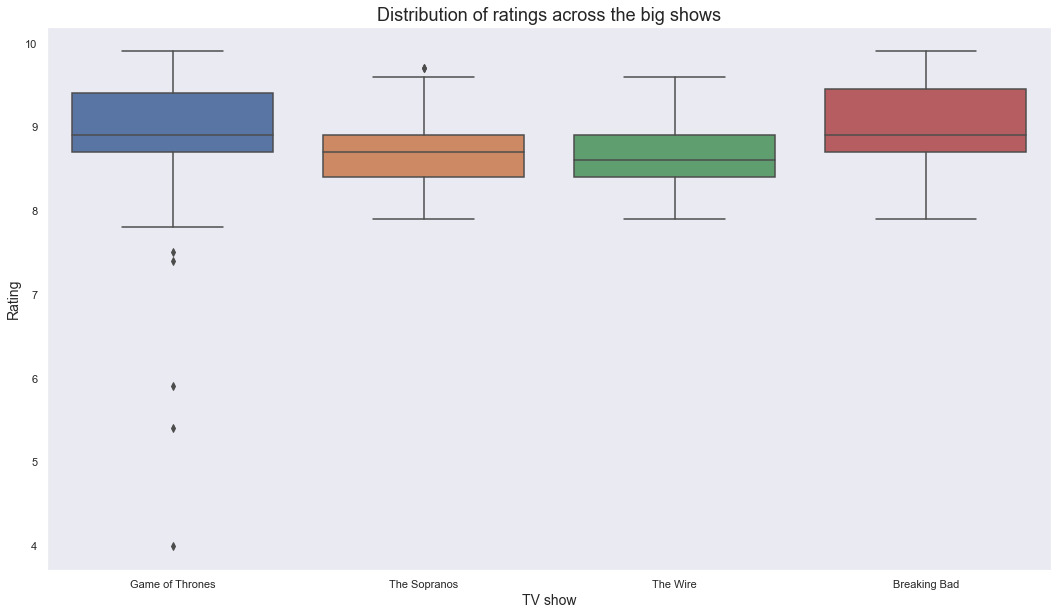

In [52]:
plt.figure(figsize= (18,10))
sns.boxplot(x = "tv", y = "rating", data = imdb_data_big4)
plt.title("Distribution of ratings across the big shows", fontsize = 18)
#plt.xlabel("Ratings", fontsize = 16)
#plt.xlim(6,11)
plt.xlabel("TV show", fontsize = 14)
plt.ylabel("Rating", fontsize = 14)
plt.show();

### Genre Analysis top 1000 episodes

In [53]:
top_episodes_collect = top_episodes[["episode", "rating", "genre1", "genre2", "genre3"]]

In [54]:
top_episodes_renew = top_episodes_collect.melt(id_vars = ["episode", "rating"], value_vars = ["genre1", "genre2", "genre3"], var_name = "genres", value_name = "genre")

In [55]:
top_episodes_renew = top_episodes_renew.drop("genres", axis = 1)

In [56]:
top_episodes_renew = top_episodes_renew.dropna()

In [57]:
top_episodes_renew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2696 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   episode  2696 non-null   object 
 1   rating   2696 non-null   float64
 2   genre    2696 non-null   object 
dtypes: float64(1), object(2)
memory usage: 84.2+ KB


In [58]:
top_episodes_genre_count = top_episodes_renew.groupby("genre", as_index = False)["episode"].count()

In [59]:
top_episodes_genre_count

,genre,episode
0,Action,499
1,Adventure,441
2,Animation,417
3,Biography,14
4,Comedy,185
5,Crime,216
6,Documentary,10
7,Drama,509
8,Family,10
9,Fantasy,81
